In [ ]:
import pandas as pd # type: ignore
from plotnine import * # type: ignore

# O tamanho do álbum faz alguma diferença? Muda de artista para artista?

In [ ]:
beatles_df = pd.DataFrame(pd.read_csv("./Artista_data/beatles_spotify.csv", sep=','))
beatles_df["artist"] = "The Beatles"

ed_sheeran_df = pd.DataFrame(pd.read_csv("./Artista_data/ed_sheeran_spotify.csv", sep=','))
ed_sheeran_df["artist"] = "Ed Sheeran"

elton_john_df = pd.DataFrame(pd.read_csv("./Artista_data/elton_john_spotify.csv", sep=','))
elton_john_df["artist"] = "Elton John"

metallica_df = pd.DataFrame(pd.read_csv("./Artista_data/metallica_spotify.csv", sep=','))
metallica_df["artist"] = "Metallica"

rolling_stones_df = pd.DataFrame(pd.read_csv("./Artista_data/rolling_stones_spotify.csv", sep=','))
rolling_stones_df["artist"] = "Rolling Stones"

tame_impala_df = pd.DataFrame(pd.read_csv("./Artista_data/tame_impala_spotify.csv", sep=','))
tame_impala_df["artist"] = "Tame Impala"

taylor_swift_df = pd.DataFrame(pd.read_csv("./Artista_data/taylor_swift_spotify.csv", sep=','))
taylor_swift_df["artist"] = "Taylor Swift"

artists_df = pd.concat([beatles_df, ed_sheeran_df, elton_john_df, metallica_df, rolling_stones_df, tame_impala_df, taylor_swift_df])

artists_df = pd.merge(artists_df, artists_df.groupby(['artist', 'album']).size().reset_index(name='album_size'), on=['artist', 'album'])

artists_df


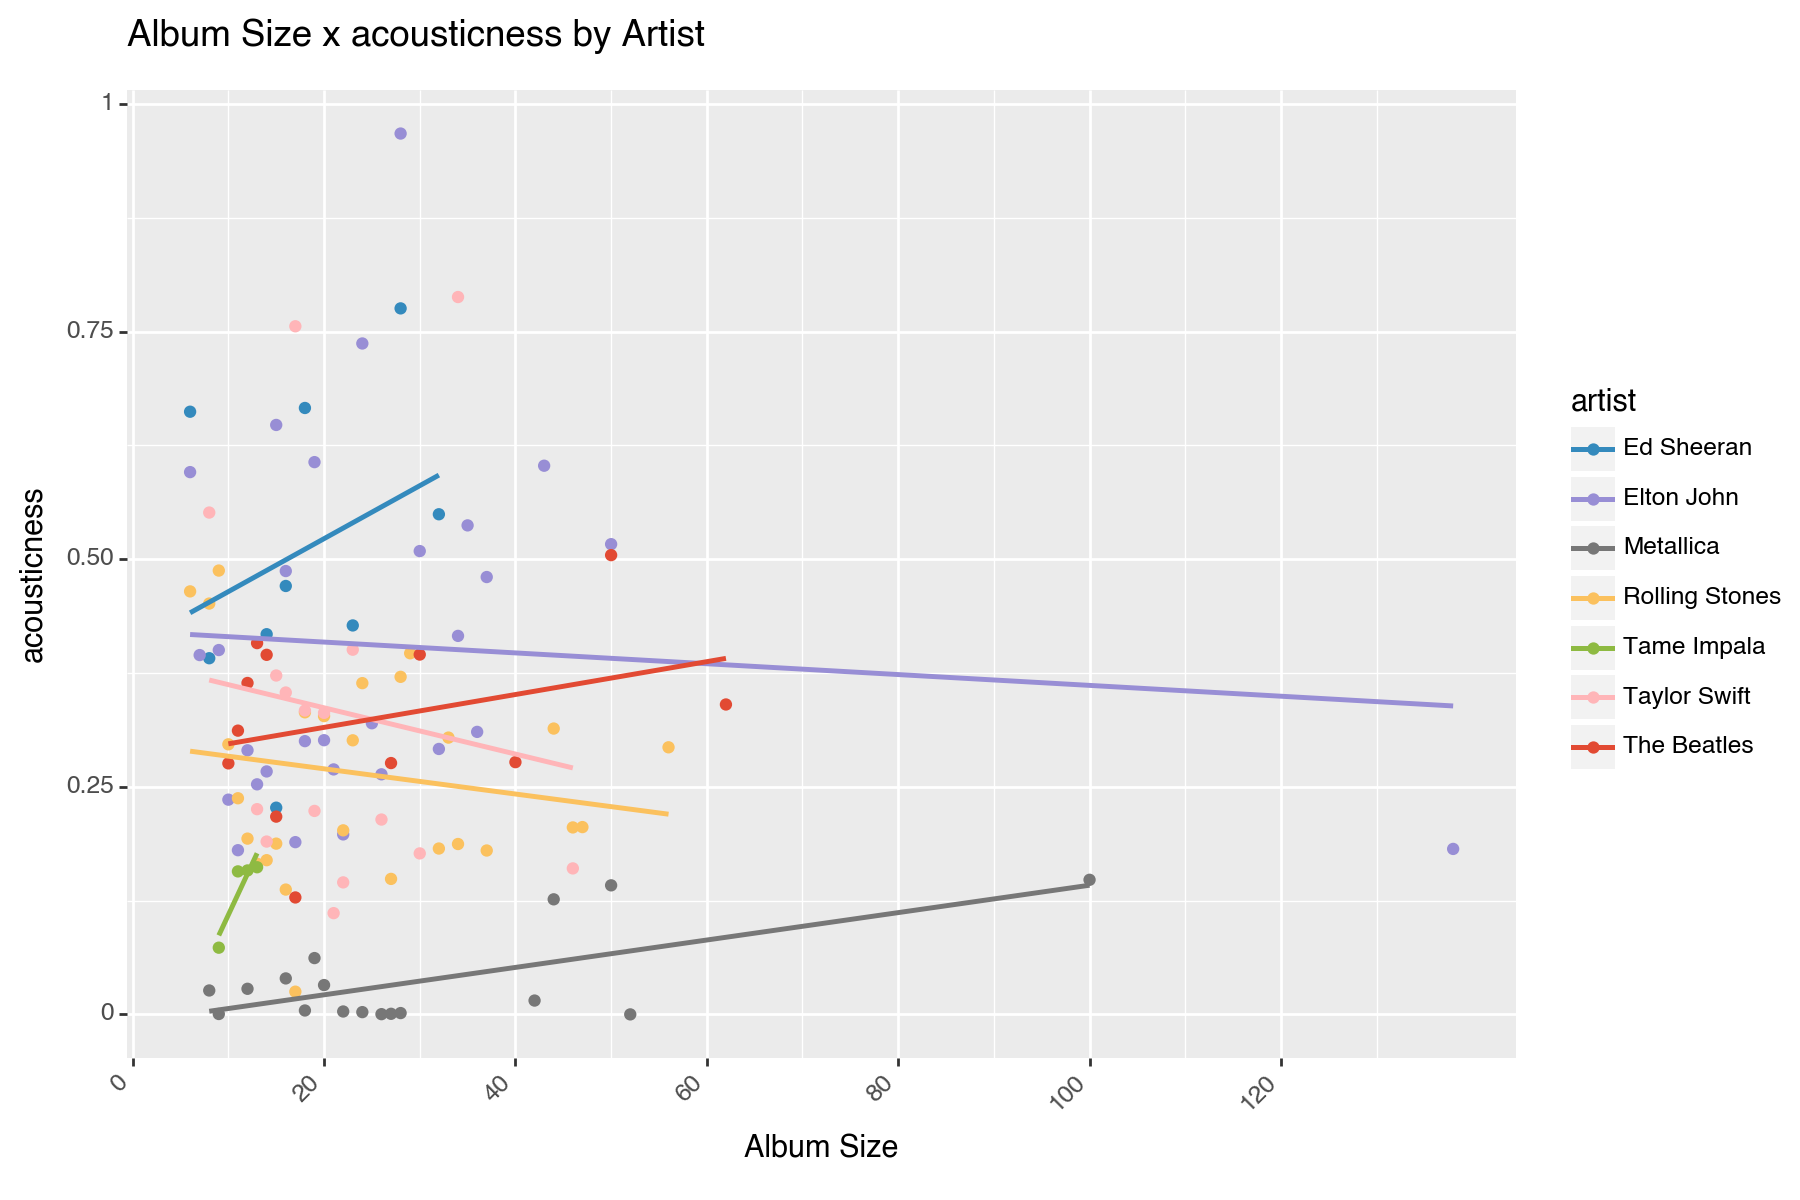

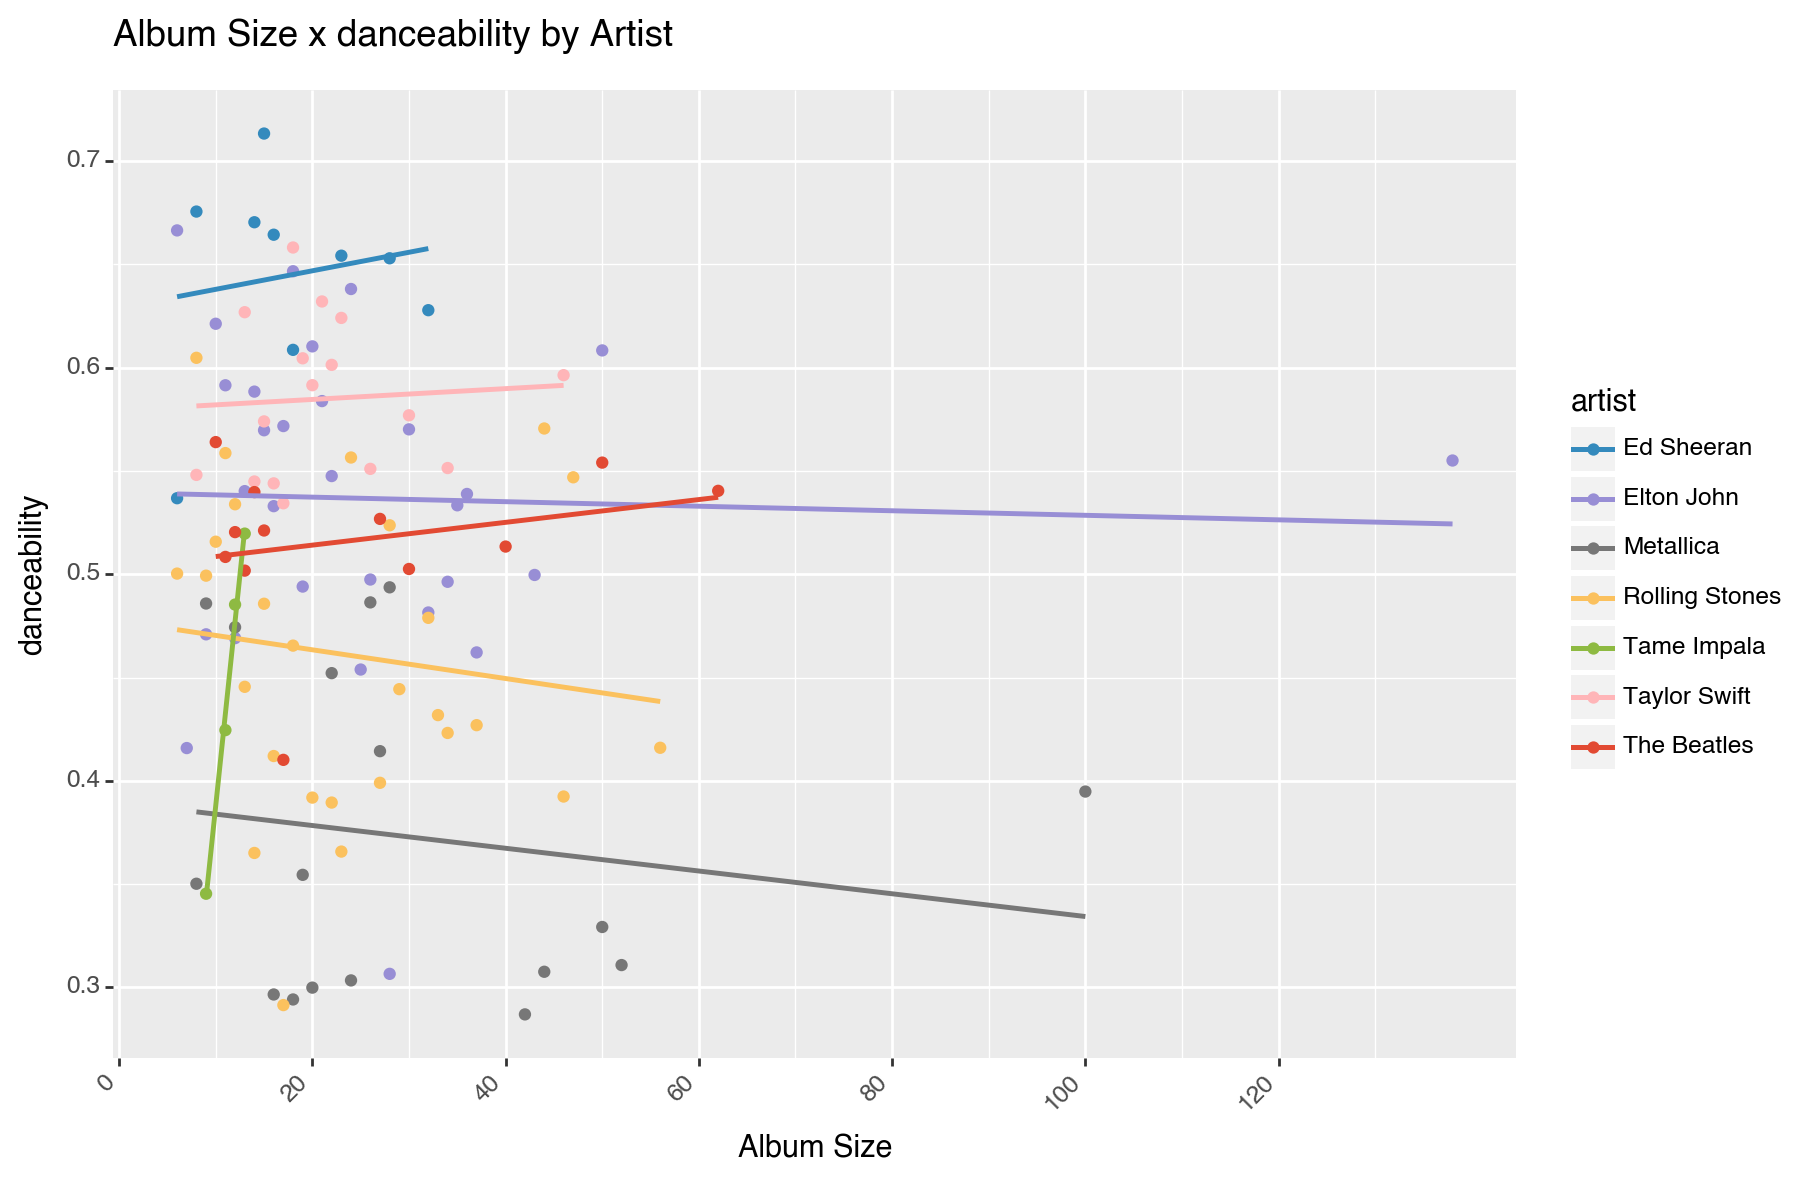

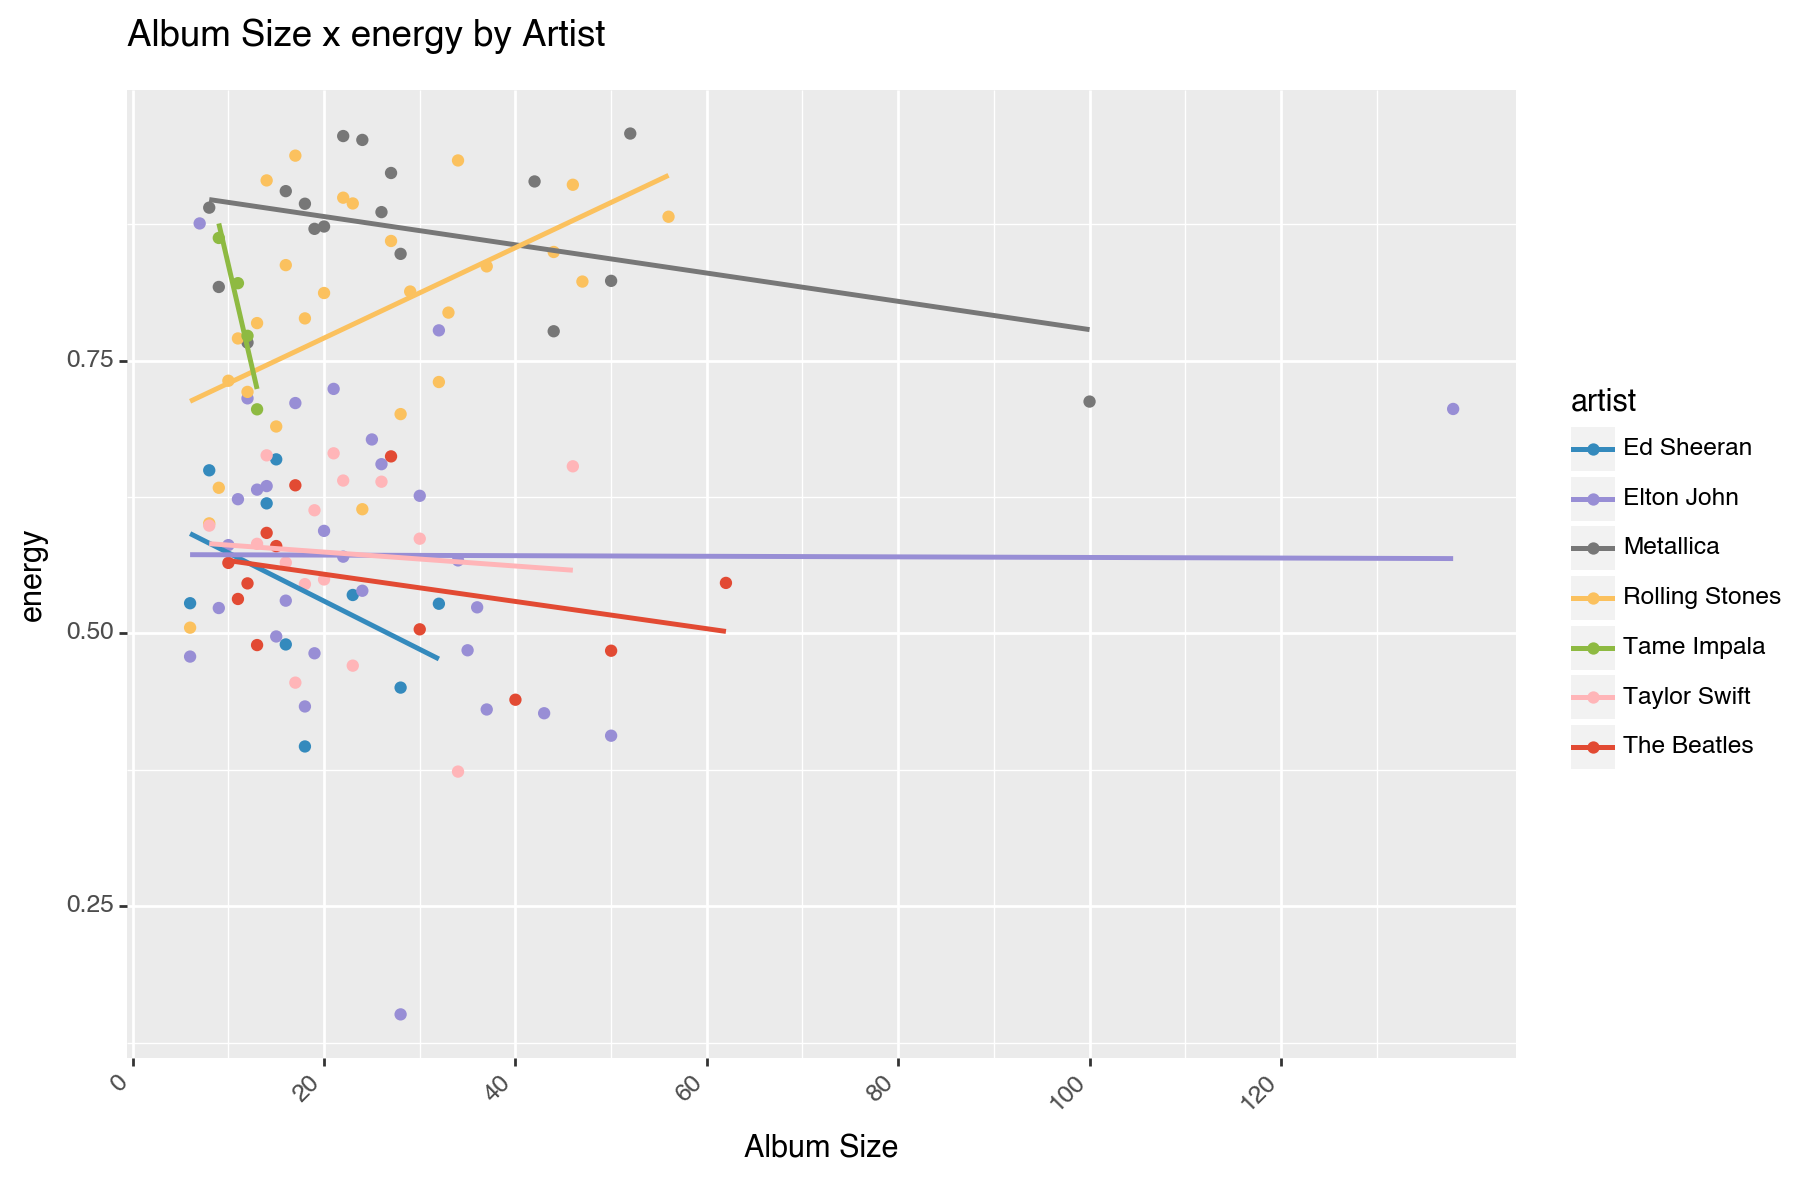

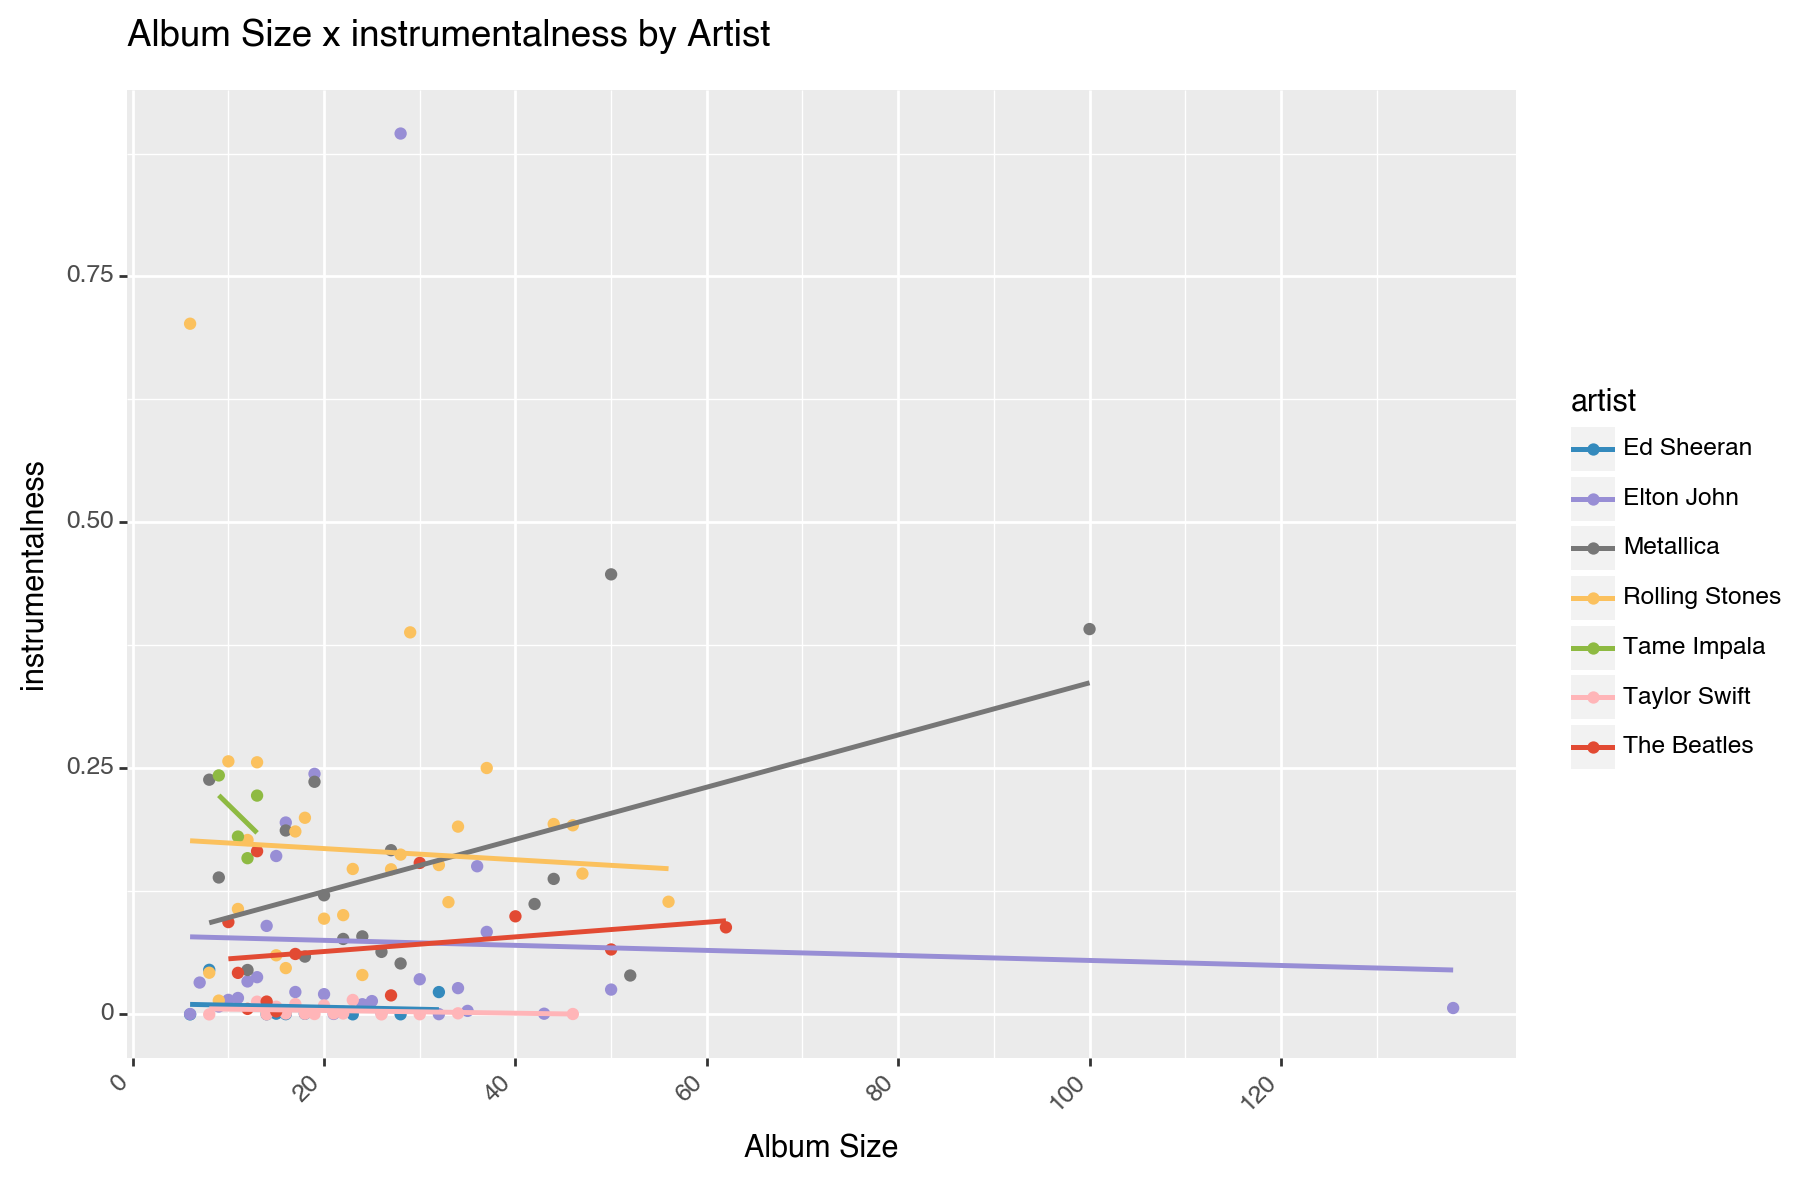

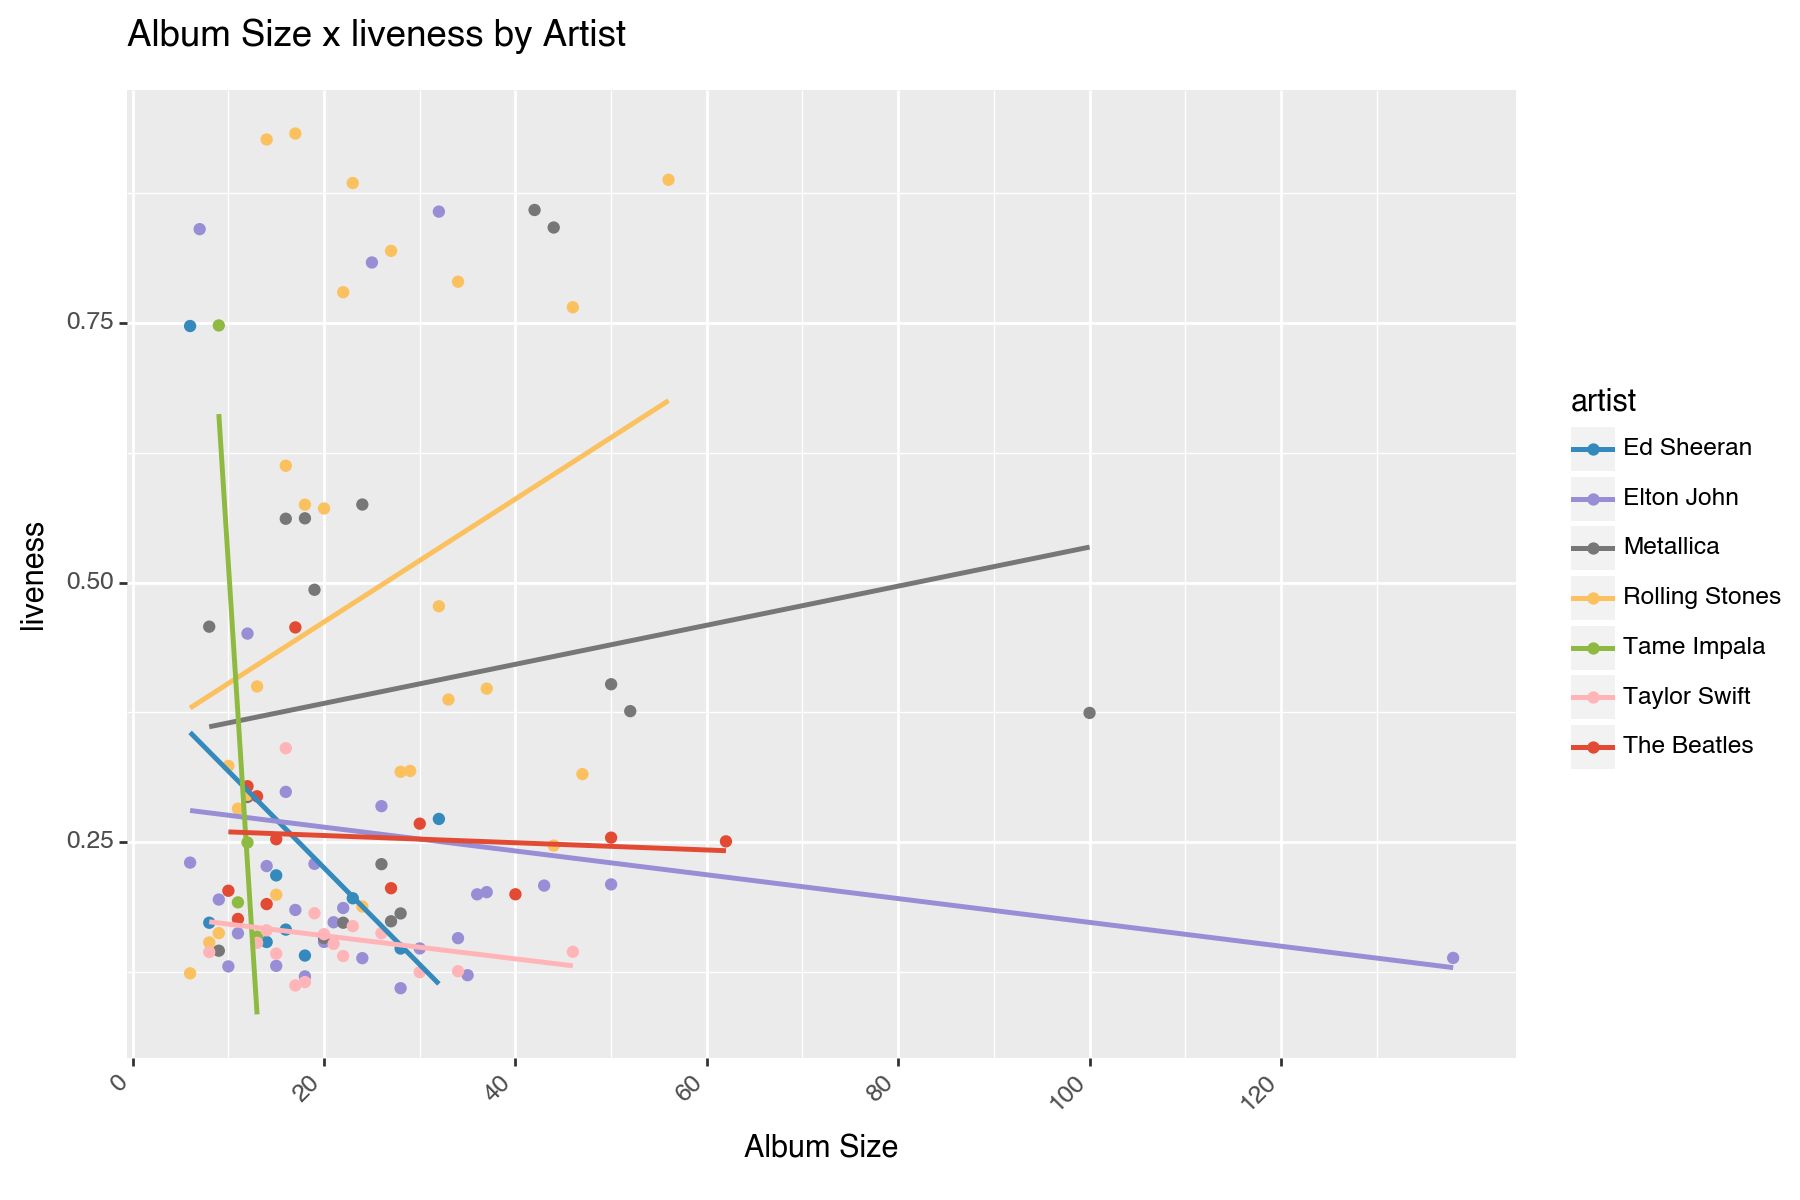

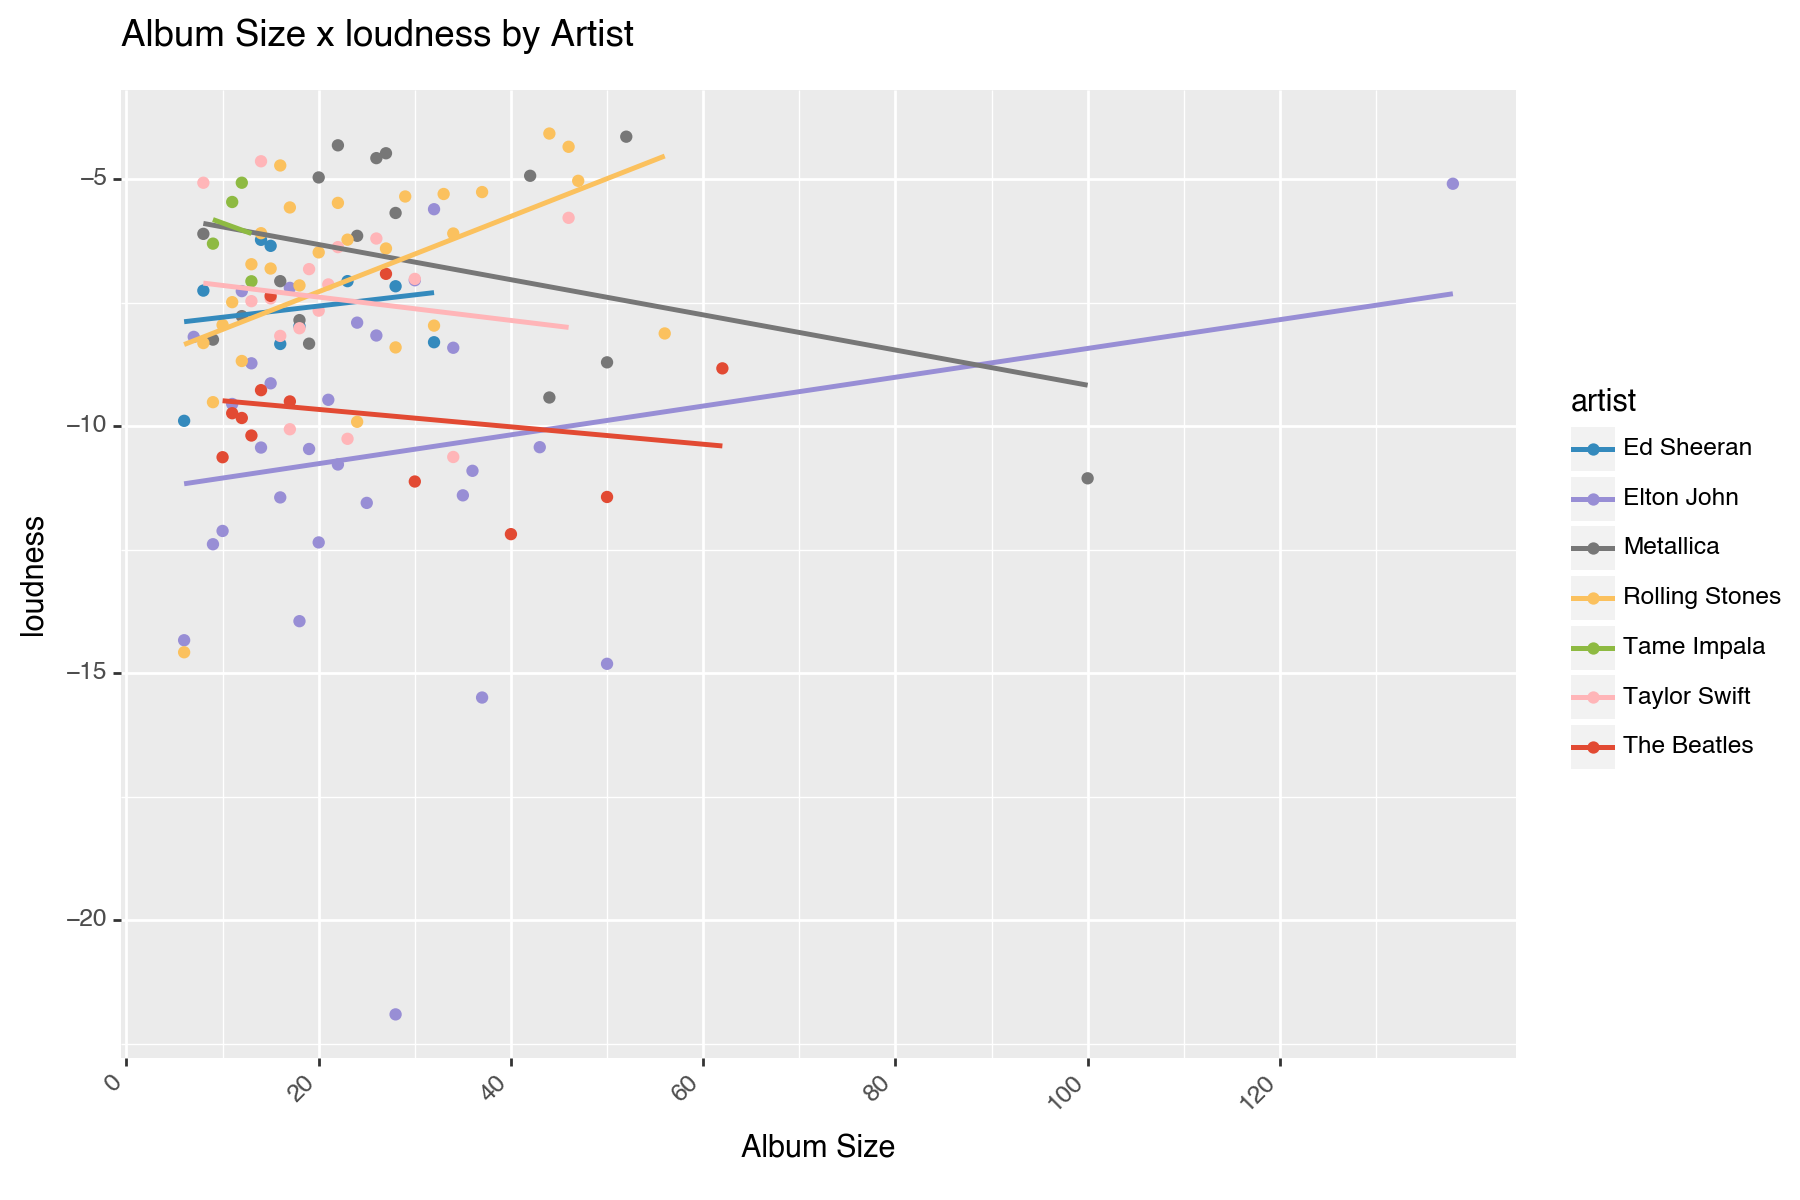

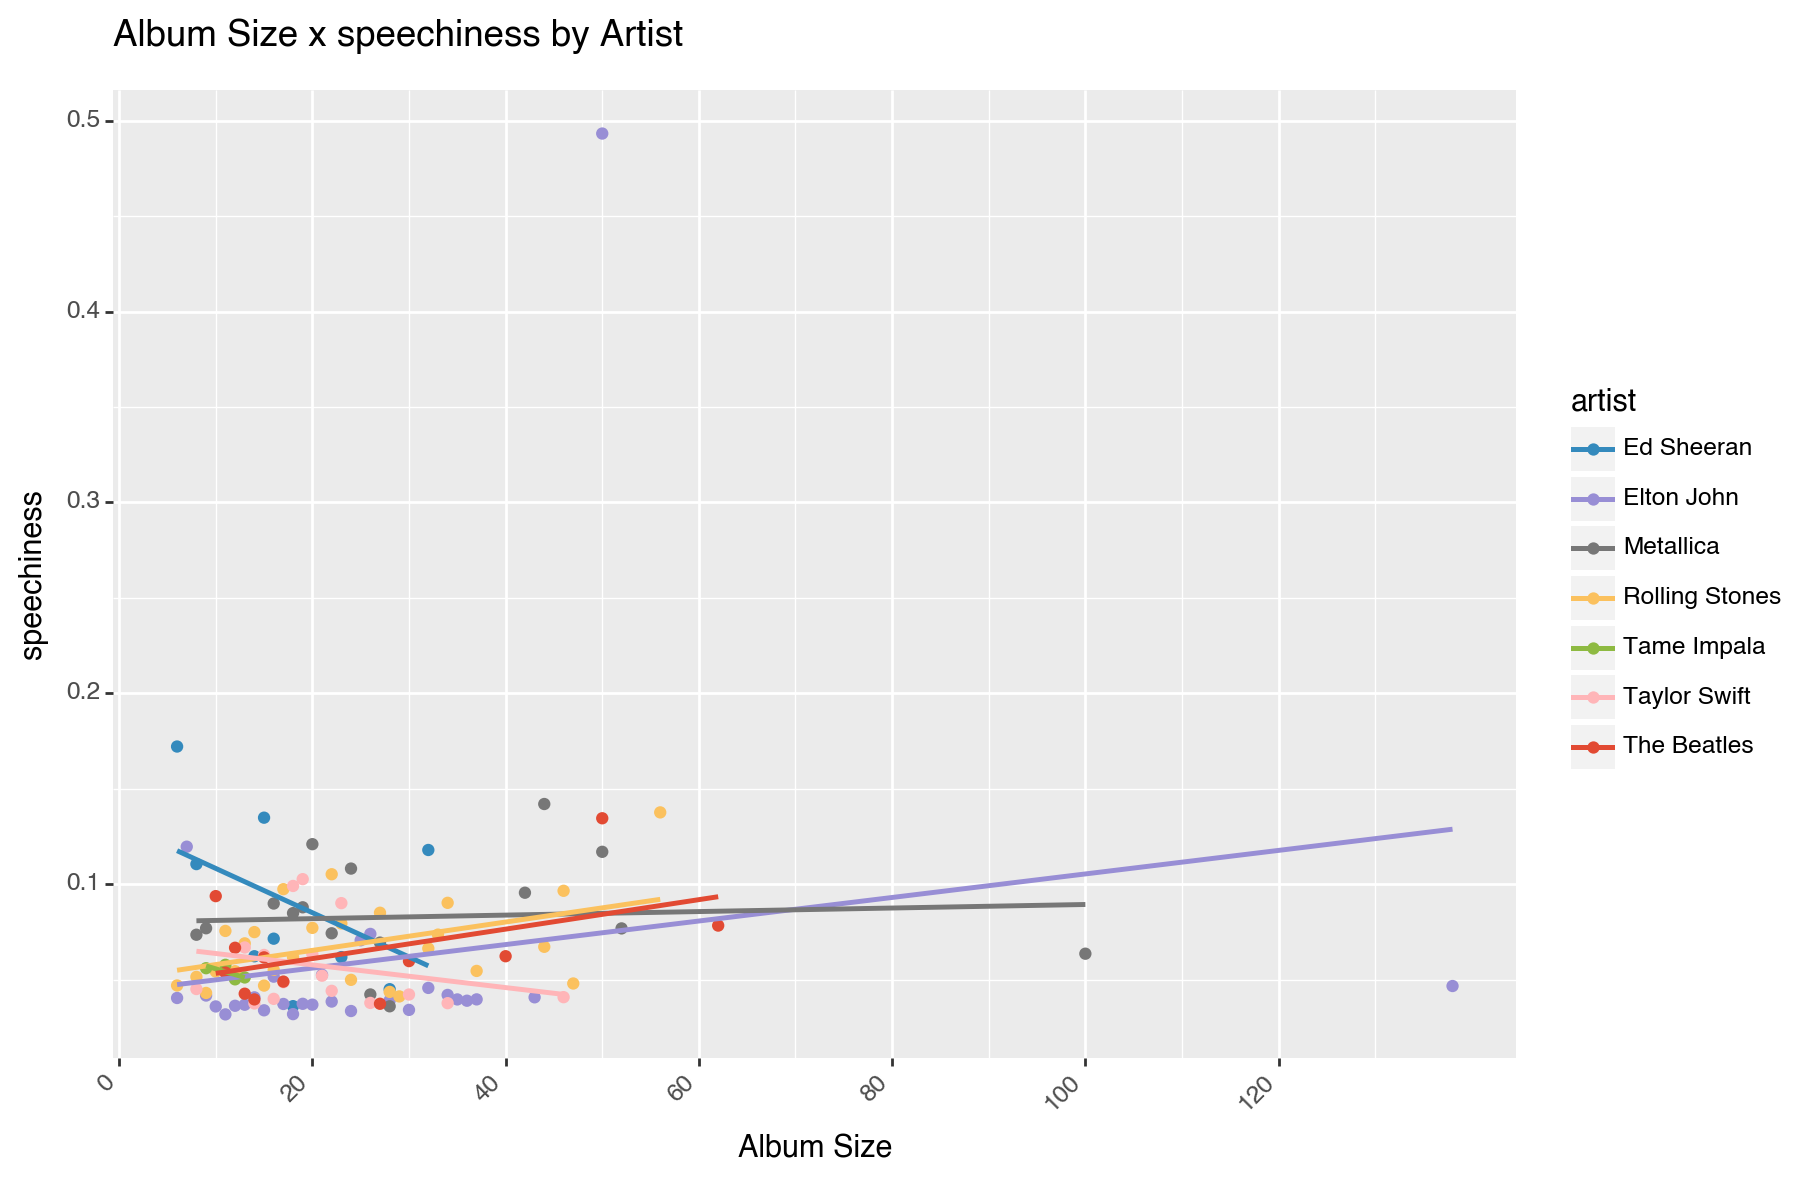

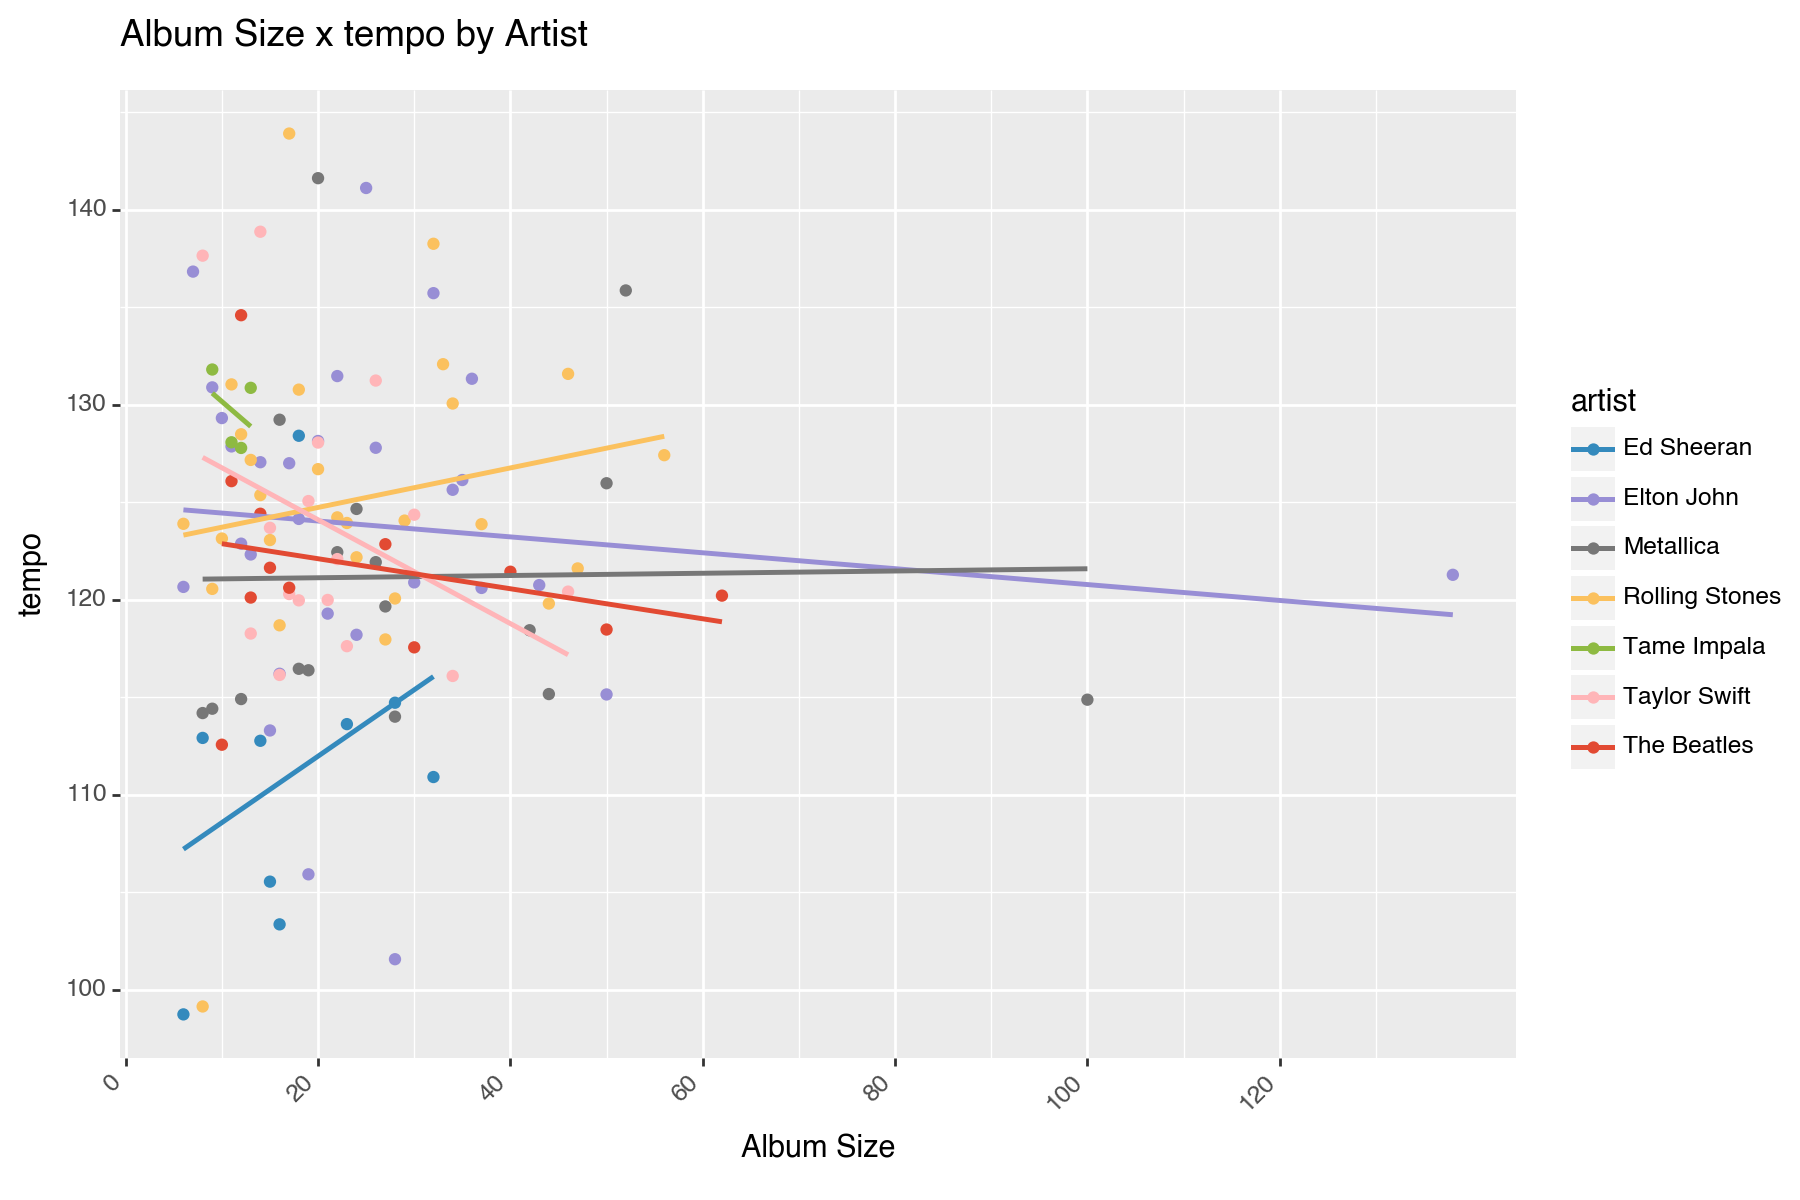

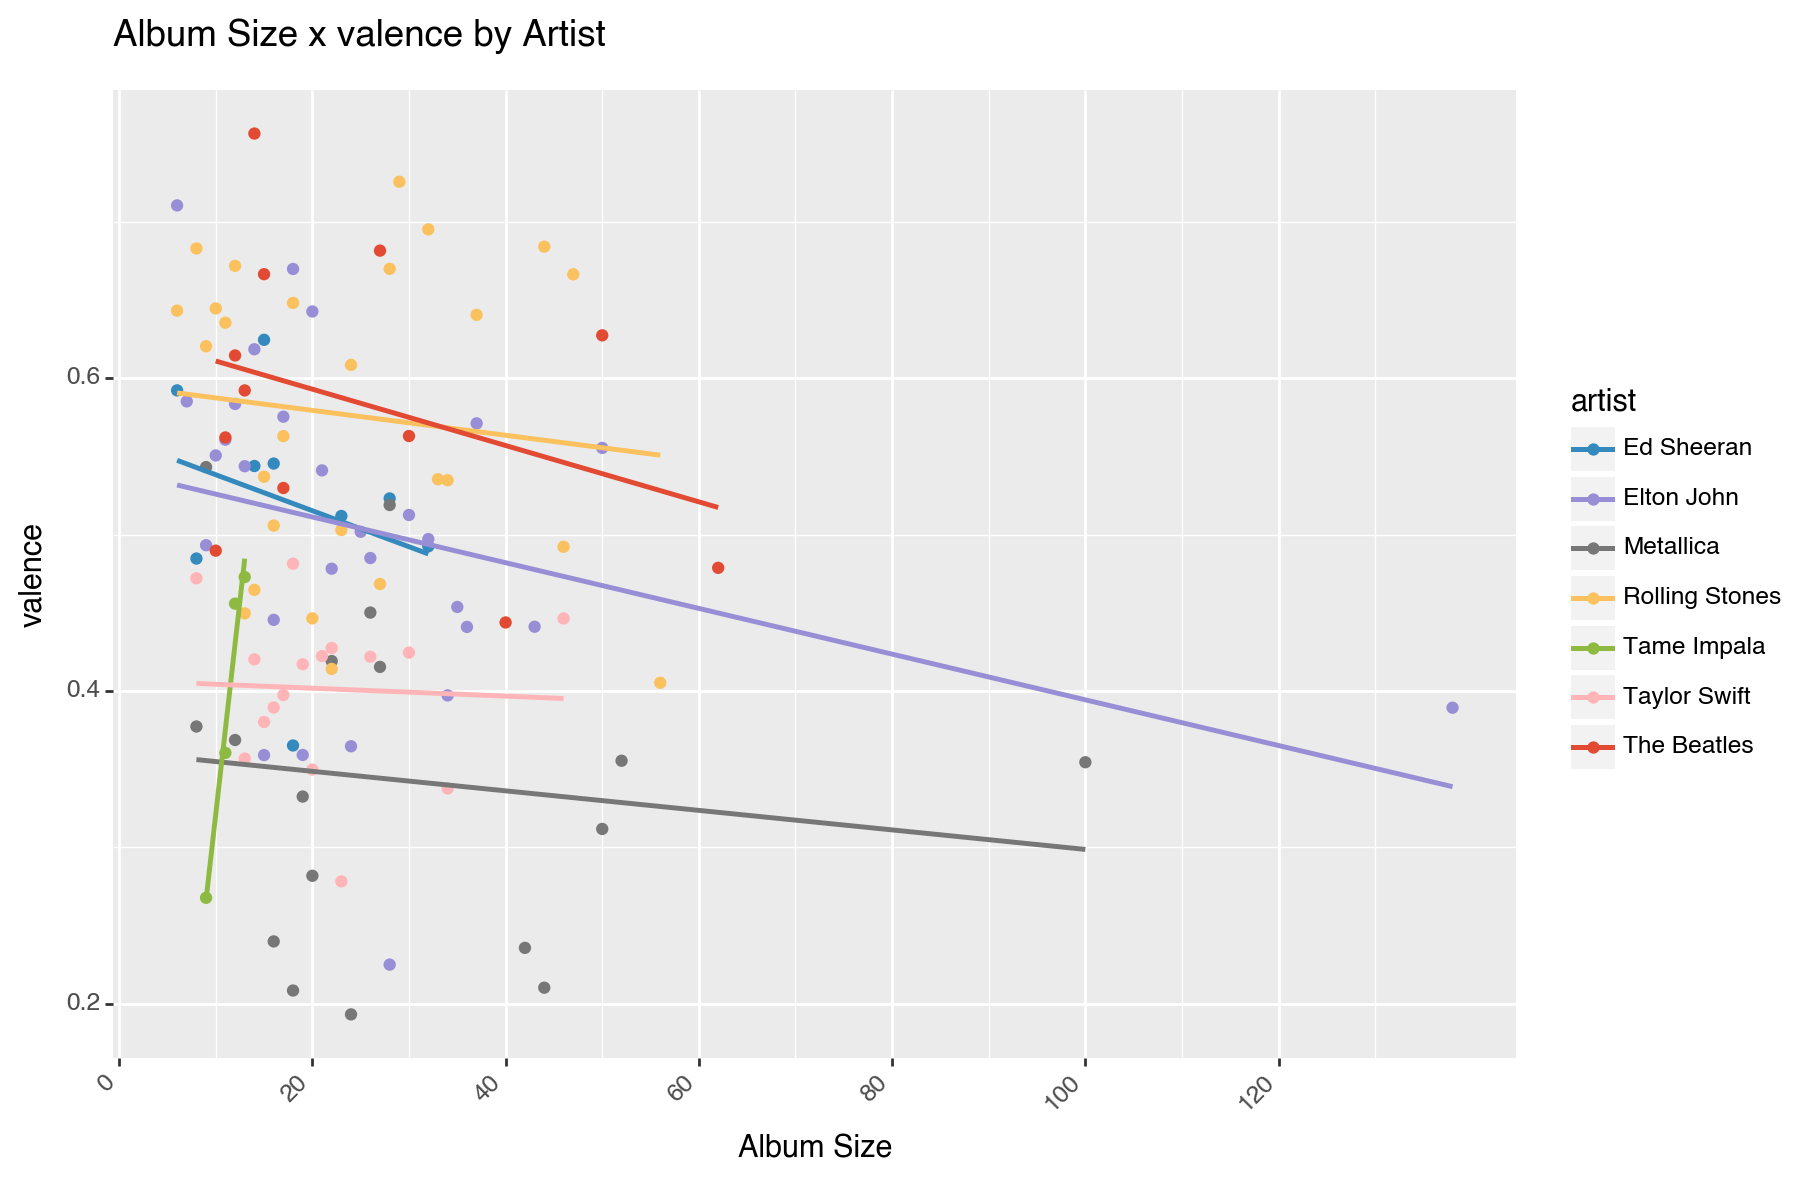

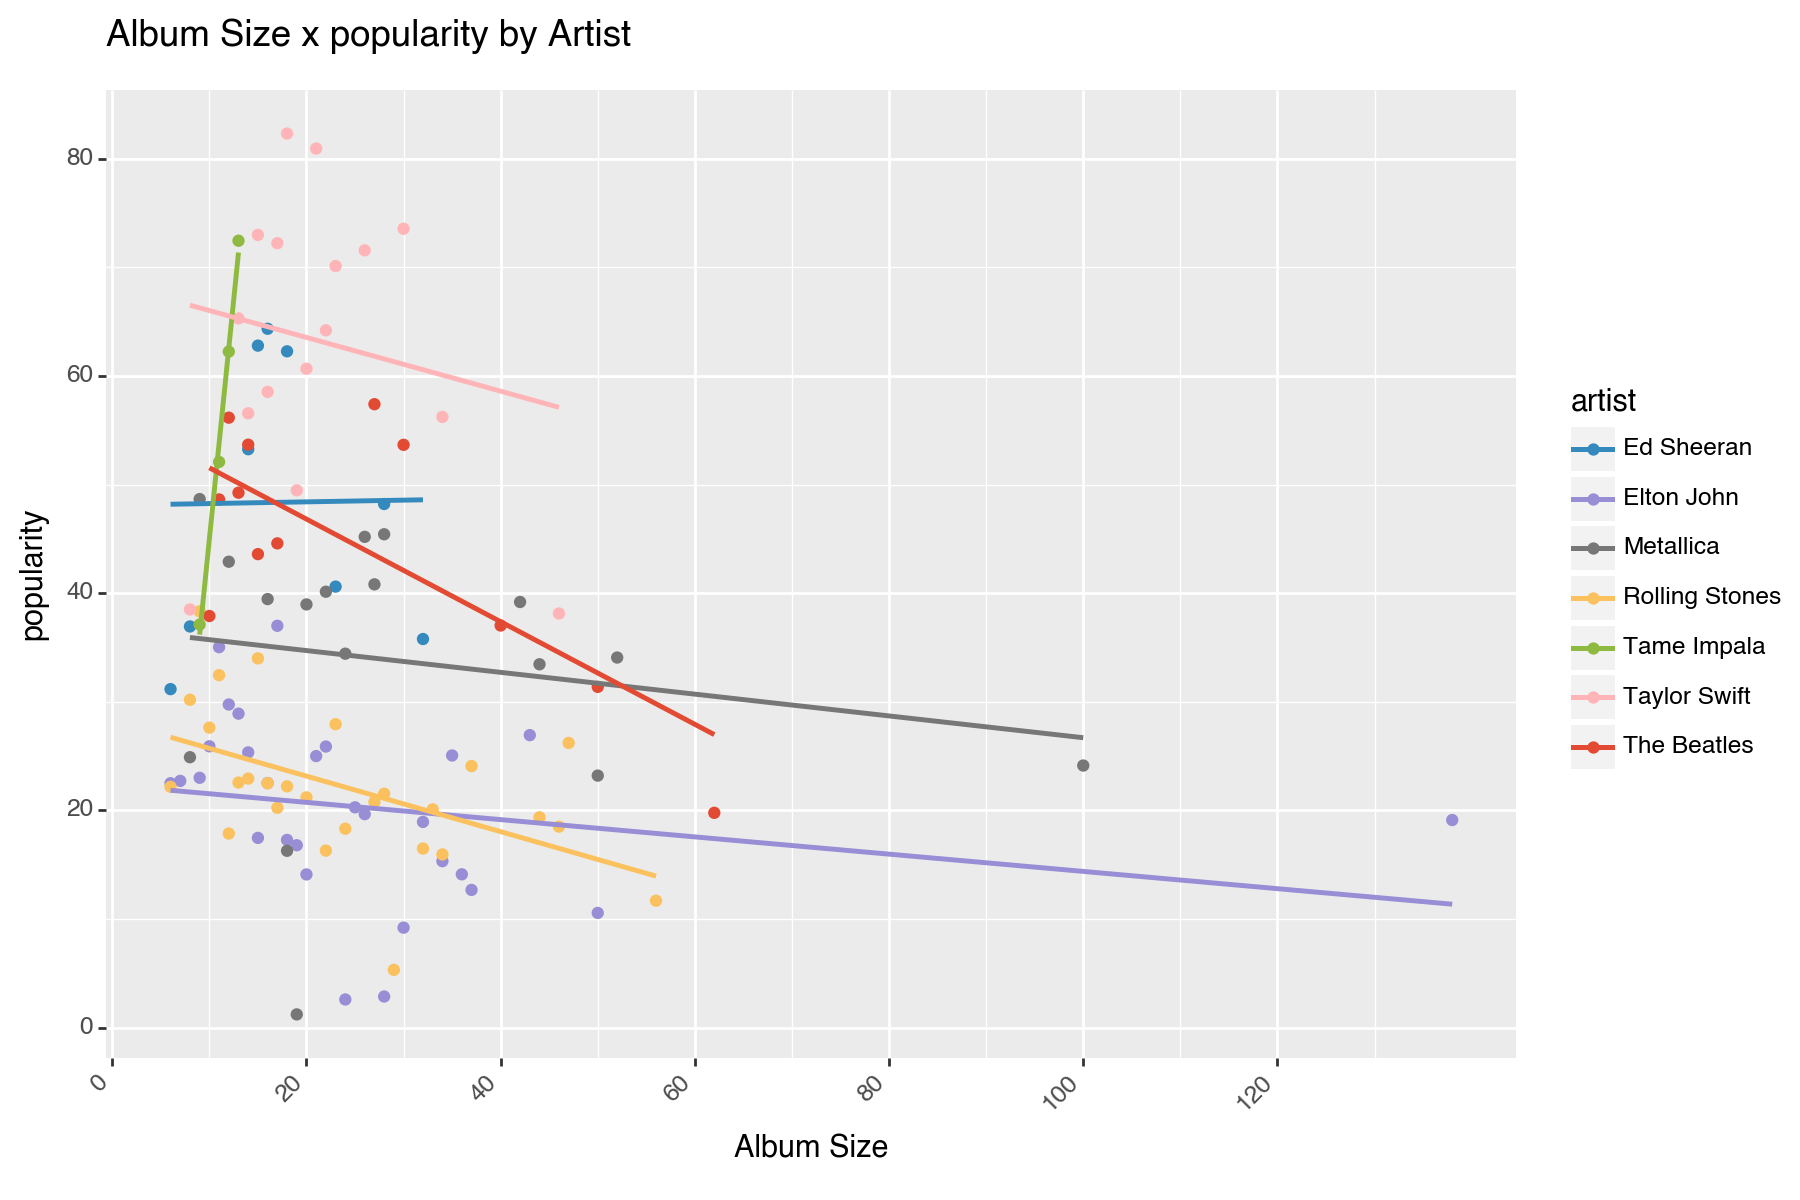

In [12]:

color_map = {
    "The Beatles": "#E24A33",
    "Ed Sheeran": "#348ABD", 
    "Elton John": "#988ED5", 
    "Metallica": "#777777",  
    "Rolling Stones": "#FBC15E",
    "Tame Impala": "#8EBA42",   
    "Taylor Swift": "#FFB5B8"   
}

for metric in artists_df.columns[7:17]:

    df = artists_df.groupby(['artist', 'album_size'])[metric].mean().reset_index()

    print(ggplot(df, aes(x='album_size', y=metric, color='artist'))
            + geom_point() 
            + geom_smooth(method='lm', se=False)
            + scale_color_manual(values=color_map)
            + labs(title=f'Album Size x {metric} by Artist', x='Album Size', y=metric)
            + theme(
                axis_text_x=element_text(rotation=45, hjust=1),
                figure_size=(9, 6), 
                legend_position='right' 
            )
            + scale_x_continuous(breaks=range(0, df['album_size'].max(), 20))
        )